<a href="https://colab.research.google.com/github/lelyashashlyk/DataScienceLearning/blob/main/vizualization/car_clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Выполнено студентом Шайыковой Лейлой :3*
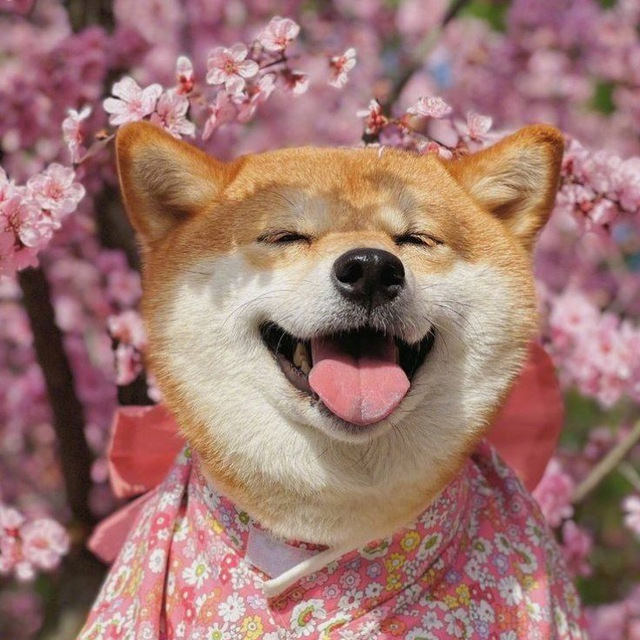

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns

np.set_printoptions(suppress=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/конспекты 4/car_cluster/daewoo_land_cruiser.csv')
df = pd.read_csv('/content/drive/MyDrive/daewoo_land_cruiser.csv')
df

In [ ]:
arr = df.values
arr

In [ ]:
sns.scatterplot(x = arr[:, 0], y = arr[:, 1], hue=arr[:, 2])
# sns.scatterplot(x = centroids[:, 0], y = centroids[:, 1], color='red')

# Задачи:



1.   Найти центроиды для каждого типа
2.   Определить ближайший центроид для каждой точки (машины).
3.   Оценить точность - какой процент точек был определен правильно



In [ ]:
# Очистим датасет от нанов, для того чтобы избежать инфов

mask1 = ~np.isnan(arr[:, 1])
mask2 = ~np.isnan(arr[:, 0])
arr = arr[mask1 & mask2]

In [ ]:
clustr0 = arr[arr[:, 2] == 0]
clustr1 = arr[arr[:, 2] == 1]
centroid0 = clustr0.mean(axis=0)
centroid1 = clustr1.mean(axis=0)

In [ ]:
sns.scatterplot(x = clustr0[:, 0], y = clustr0[:, 1], color = 'orange', alpha = 0.4, label = 'Cluster 0')
sns.scatterplot(x = clustr1[:, 0], y = clustr1[:, 1], color = 'purple', alpha = 0.4, label = 'Cluster 1')
sns.scatterplot(x = [centroid0[0]], y = [centroid0[1]], color = 'blue')
sns.scatterplot(x = [centroid1[0]], y = [centroid1[1]], color = 'green')

In [ ]:
distance0 = np.sqrt(((arr - centroid0)**2).sum(axis = 1))
distance1 = np.sqrt(((arr - centroid1)**2).sum(axis = 1))
clustr = np.where(distance0 < distance1 , 0, 1)

sns.scatterplot(x=arr[:,0], y=arr[:,1], hue = clustr)
sns.scatterplot(x=[centroid0[0]], y=[centroid0[1]], color='red', marker='X', s=200)
sns.scatterplot(x=[centroid1[0]], y=[centroid1[1]], color='red', marker='X', s=200)

In [ ]:
centroid_check = (np.where(arr[:,2] == clustr, 1, 0)).sum()
n = arr.shape[0]
correct_perc = (centroid_check/n)*100


import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.pie([correct_perc, 100 - correct_perc],
        labels=['Правильно кластеризованные', 'Неправильно кластеризованные'],
        colors=['lightpink', 'hotpink'], autopct='%.1f%%', startangle=90)
plt.title("Процент корректной кластеризации", pad = 30)
plt.axis('equal')  # Чтобы круг был ровным
plt.show()